# Bank Loan Repayment predicton using RandomForestAlgorithm

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
df=pd.read_csv('train.csv')

In [105]:
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36 months,,12.49,B,B5,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60 months,BAT2003848,14.99,C,C5,Account Mgr,...,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60 months,NaN,20.80,E,E1,Comcast cable,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60 months,BAT3193689,16.29,D,D2,Resident Physician,...,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0,0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [107]:
df.isna().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [111]:

df['emp_length'].value_counts()

10+ years    175105
2 years       47276
< 1 year      42253
3 years       42175
1 year        34202
5 years       33393
4 years       31581
7 years       26680
8 years       26443
6 years       25741
9 years       20688
Name: emp_length, dtype: int64

In [112]:
df['emp_length'].replace('n/a', '0', inplace=True)
df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
df['emp_length'].value_counts()
df['emp_length']=pd.to_numeric(df['emp_length'])

In [113]:
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36,,12.49,B,B5,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60,BAT2003848,14.99,C,C5,Account Mgr,...,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60,NaN,20.80,E,E1,Comcast cable,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60,BAT3193689,16.29,D,D2,Resident Physician,...,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0,0


In [109]:
df['term'].replace(to_replace=' months', value='', regex=True, inplace=True) 

df['term'] = pd.to_numeric(df['term'])

In [110]:
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36,,12.49,B,B5,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60,BAT2003848,14.99,C,C5,Account Mgr,...,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60,NaN,20.80,E,E1,Comcast cable,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60,BAT3193689,16.29,D,D2,Resident Physician,...,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0,0


In [114]:
df['sub_grade'].value_counts()

B3    33844
B4    33198
C1    31975
C2    31356
C3    30080
B2    29390
B5    29313
C4    29103
A5    27016
B1    26968
C5    24985
D1    21712
A4    20823
D2    17991
D3    15771
D4    15226
A3    14082
A1    13653
A2    13533
D5    12867
E1    10928
E2    10255
E3     8488
E4     7051
E5     5773
F1     4350
F2     3196
F3     2708
F4     2056
F5     1516
G1     1112
G2      824
G3      559
G4      391
G5      335
Name: sub_grade, dtype: int64

In [115]:
df['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True) 

# Convert it to numeric
df['sub_grade'] = pd.to_numeric(df['sub_grade'], errors='coerce') 

In [116]:
df['sub_grade'].value_counts()

13    33844
14    33198
21    31975
22    31356
23    30080
12    29390
15    29313
24    29103
5     27016
11    26968
25    24985
31    21712
4     20823
32    17991
33    15771
34    15226
3     14082
1     13653
2     13533
35    12867
41    10928
42    10255
43     8488
44     7051
45     5773
51     4350
52     3196
53     2708
54     2056
55     1516
61     1112
62      824
63      559
64      391
65      335
Name: sub_grade, dtype: int64

In [117]:
df['last_week_pay'].value_counts()

13th week     30333
9th week      28626
26th week     27475
22th week     26000
4th week      25704
              ...  
300th week        1
278th week        1
274th week        1
269th week        1
304th week        1
Name: last_week_pay, Length: 98, dtype: int64

In [118]:
df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)

df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

df['last_week_pay'] = pd.to_numeric(df['last_week_pay'])

In [119]:
df['last_week_pay'].value_counts()

13.0     30333
9.0      28626
26.0     27475
22.0     26000
4.0      25704
         ...  
300.0        1
278.0        1
274.0        1
269.0        1
304.0        1
Name: last_week_pay, Length: 97, dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  int64  
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  int64  
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  float64
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [121]:
df.isna().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [ ]:
num_cols = ['acc_now_delinq',  'collections_12_mths_ex_med','pub_rec','inq_last_6mths','delinq_2yrs']
for col in num_cols:
    df[col].fillna(0, inplace=True)

In [122]:
columns = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade',
           'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
           'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 
           'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in columns:
    df[col].fillna(df[col].median(), inplace=True)  


In [123]:
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,43,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,14,Human Resources Specialist,...,0.0,44.0,INDIVIDUAL,NaN,9.0,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,4,Driver,...,0.0,44.0,INDIVIDUAL,NaN,9.0,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,35,Us office of Personnel Management,...,0.0,44.0,INDIVIDUAL,NaN,135.0,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,12,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,44.0,INDIVIDUAL,NaN,96.0,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36,,12.49,B,15,Registered Nurse,...,0.0,44.0,INDIVIDUAL,NaN,65.0,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60,BAT2003848,14.99,C,25,Account Mgr,...,0.0,44.0,INDIVIDUAL,NaN,70.0,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60,NaN,20.80,E,41,Comcast cable,...,0.0,44.0,INDIVIDUAL,NaN,9.0,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60,BAT3193689,16.29,D,32,Resident Physician,...,0.0,44.0,INDIVIDUAL,NaN,78.0,0.0,0.0,29197.0,23300.0,0


In [124]:
df.isna().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
pub_rec     

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  int64  
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  int64  
 9   emp_title                    501595 non-null  object 
 10  emp_length                   532428 non-null  float64
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532428 non-null  float64
 13 

In [127]:
cols=['home_ownership','verification_status_joint','addr_state','zip_code','title','purpose','desc','pymnt_plan','verification_status','emp_title','desc','batch_enrolled','title','grade','application_type','initial_list_status']

df.drop(columns=cols,inplace=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  int64  
 5   int_rate                     532428 non-null  float64
 6   sub_grade                    532428 non-null  int64  
 7   emp_length                   532428 non-null  float64
 8   annual_inc                   532428 non-null  float64
 9   dti                          532428 non-null  float64
 10  delinq_2yrs                  532428 non-null  float64
 11  inq_last_6mths               532428 non-null  float64
 12  mths_since_last_delinq       532428 non-null  float64
 13 

In [129]:
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,19.19,43,9.0,28700.0,33.88,...,0.0,0.0,0.0,74.0,26.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,10.99,14,0.0,65000.0,3.64,...,0.0,0.0,0.0,44.0,9.0,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,7.26,4,2.0,45000.0,18.42,...,0.0,0.0,0.0,44.0,9.0,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,19.72,35,10.0,105000.0,14.97,...,0.0,0.0,0.0,44.0,135.0,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,10.64,12,10.0,52000.0,20.16,...,0.0,0.0,0.0,44.0,96.0,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36,12.49,15,10.0,75000.0,14.53,...,0.0,0.0,0.0,44.0,65.0,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60,14.99,25,10.0,59000.0,22.97,...,0.0,0.0,0.0,44.0,70.0,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60,20.80,41,8.0,42504.0,27.27,...,0.0,0.0,0.0,44.0,9.0,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60,16.29,32,1.0,50000.0,14.91,...,0.0,0.0,0.0,44.0,78.0,0.0,0.0,29197.0,23300.0,0


In [130]:
df.isna().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
sub_grade                      0
emp_length                     0
annual_inc                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
last_week_pay                  0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
total_rev_hi_lim               0
loan_statu

In [131]:
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,19.19,43,9.0,28700.0,33.88,...,0.0,0.0,0.0,74.0,26.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,10.99,14,0.0,65000.0,3.64,...,0.0,0.0,0.0,44.0,9.0,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,7.26,4,2.0,45000.0,18.42,...,0.0,0.0,0.0,44.0,9.0,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,19.72,35,10.0,105000.0,14.97,...,0.0,0.0,0.0,44.0,135.0,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,10.64,12,10.0,52000.0,20.16,...,0.0,0.0,0.0,44.0,96.0,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36,12.49,15,10.0,75000.0,14.53,...,0.0,0.0,0.0,44.0,65.0,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60,14.99,25,10.0,59000.0,22.97,...,0.0,0.0,0.0,44.0,70.0,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60,20.80,41,8.0,42504.0,27.27,...,0.0,0.0,0.0,44.0,9.0,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60,16.29,32,1.0,50000.0,14.91,...,0.0,0.0,0.0,44.0,78.0,0.0,0.0,29197.0,23300.0,0


In [132]:
dff=df.copy()

In [133]:
dff

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,19.19,43,9.0,28700.0,33.88,...,0.0,0.0,0.0,74.0,26.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,10.99,14,0.0,65000.0,3.64,...,0.0,0.0,0.0,44.0,9.0,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,7.26,4,2.0,45000.0,18.42,...,0.0,0.0,0.0,44.0,9.0,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,19.72,35,10.0,105000.0,14.97,...,0.0,0.0,0.0,44.0,135.0,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,10.64,12,10.0,52000.0,20.16,...,0.0,0.0,0.0,44.0,96.0,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36,12.49,15,10.0,75000.0,14.53,...,0.0,0.0,0.0,44.0,65.0,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60,14.99,25,10.0,59000.0,22.97,...,0.0,0.0,0.0,44.0,70.0,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60,20.80,41,8.0,42504.0,27.27,...,0.0,0.0,0.0,44.0,9.0,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60,16.29,32,1.0,50000.0,14.91,...,0.0,0.0,0.0,44.0,78.0,0.0,0.0,29197.0,23300.0,0


In [134]:
df.shape

(532428, 31)

In [135]:
dff.shape

(532428, 31)

In [136]:
dff.isna().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
sub_grade                      0
emp_length                     0
annual_inc                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
last_week_pay                  0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
total_rev_hi_lim               0
loan_statu

In [138]:
x=dff.drop(columns=['loan_status'])
y=df['loan_status']

In [140]:
print(x.shape)
dff.shape

(532428, 30)


(532428, 31)

In [141]:
y

0         0
1         0
2         0
3         0
4         0
         ..
532423    0
532424    0
532425    1
532426    0
532427    0
Name: loan_status, Length: 532428, dtype: int64

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15, stratify=y)
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [143]:
ypred=rfc.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,ypred)

0.9261686982326315

In [145]:
df1=pd.read_csv('test_indessa.csv')

In [146]:
df1.isna().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    354951 non-null  int64  
 1   loan_amnt                    354951 non-null  int64  
 2   funded_amnt                  354951 non-null  int64  
 3   funded_amnt_inv              354951 non-null  float64
 4   term                         354951 non-null  object 
 5   batch_enrolled               309352 non-null  object 
 6   int_rate                     354951 non-null  float64
 7   grade                        354951 non-null  object 
 8   sub_grade                    354951 non-null  object 
 9   emp_title                    334322 non-null  object 
 10  emp_length                   337017 non-null  object 
 11  home_ownership               354951 non-null  object 
 12  annual_inc                   354950 non-null  float64
 13 

In [148]:
df=df1.copy()

In [149]:
df['term'].replace(to_replace=' months', value='', regex=True, inplace=True) 

df['term'] = pd.to_numeric(df['term'])


df['emp_length'].value_counts()

df['emp_length'].replace('n/a', '0', inplace=True)
df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
df['emp_length'].value_counts()
df['emp_length']=pd.to_numeric(df['emp_length'])

df['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True) 

# Convert it to numeric
df['sub_grade'] = pd.to_numeric(df['sub_grade'], errors='coerce') 

df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)

df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

df['last_week_pay'] = pd.to_numeric(df['last_week_pay'])

columns = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade',
           'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
           'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 
           'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in columns:
    df[col].fillna(df[col].median(), inplace=True)  

  
num_cols = ['acc_now_delinq',  'collections_12_mths_ex_med','pub_rec','inq_last_6mths','delinq_2yrs']
for col in num_cols:
    df[col].fillna(0, inplace=True)
    
cols=['home_ownership','verification_status_joint','addr_state','zip_code','title','purpose','desc','pymnt_plan','verification_status','emp_title','desc','batch_enrolled','title','grade','application_type','initial_list_status']

df.drop(columns=cols,inplace=True)
print(df)
print(df.info)
print(df.isna().sum)

        member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0        11937648      14000        14000          14000.0    60     16.24   
1        38983318      16000        16000          16000.0    60      9.49   
2        27999917      11050        11050          11050.0    60     15.61   
3        61514932      35000        35000          34700.0    60     12.69   
4        59622821       6500         6500           6500.0    36      6.89   
...           ...        ...          ...              ...   ...       ...   
354946   19145105      15000        15000          15000.0    36      6.49   
354947   46304777      35000        35000          35000.0    60     25.89   
354948     903745      14000        14000          13975.0    60     17.51   
354949   53032475      20000        20000          20000.0    36      7.26   
354950     994245       2700         2700           2450.0    60      7.49   

        sub_grade  emp_length  annual_inc    dti  ...  total_re

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    354951 non-null  int64  
 1   loan_amnt                    354951 non-null  int64  
 2   funded_amnt                  354951 non-null  int64  
 3   funded_amnt_inv              354951 non-null  float64
 4   term                         354951 non-null  int64  
 5   int_rate                     354951 non-null  float64
 6   sub_grade                    354951 non-null  int64  
 7   emp_length                   354951 non-null  float64
 8   annual_inc                   354951 non-null  float64
 9   dti                          354951 non-null  float64
 10  delinq_2yrs                  354951 non-null  float64
 11  inq_last_6mths               354951 non-null  float64
 12  mths_since_last_delinq       354951 non-null  float64
 13 

In [154]:
df.isna().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
sub_grade                      0
emp_length                     0
annual_inc                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
last_week_pay                  0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
total_rev_hi_lim               0
dtype: int

In [155]:
df.shape

(354951, 30)

In [156]:
cpred=rfc.predict(df)
print(cpred)

[0 0 0 ... 1 0 1]


In [157]:
df['loan_status']=cpred

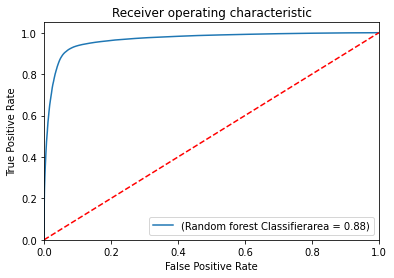

In [158]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='(Random forest Classifierarea = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [159]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, rfc.predict(X_test))

0.7489797929709693

In [161]:
sub=df[['member_id','loan_status']]
sub.to_csv('submission_output.csv')

In [162]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score

print("==========================")

preds=rfc.predict(X_test)

print('Test Accuracy %.3f' % accuracy_score(y_test, preds))
print("==========================")
print("Confusion Matrix :")
print(confusion_matrix(y_test, preds))
print("==========================")
print(classification_report(y_test, preds))
print("==========================")
print('Precision Score %.3f' % precision_score(y_test, preds))
print('Recall Score %.3f' % recall_score(y_test, preds))
print('F1 Score %.3f' % f1_score(y_test, preds)) 

Test Accuracy 0.926
Confusion Matrix :
[[118129   3852]
 [  7941  29807]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95    121981
           1       0.89      0.79      0.83     37748

    accuracy                           0.93    159729
   macro avg       0.91      0.88      0.89    159729
weighted avg       0.92      0.93      0.92    159729

Precision Score 0.886
Recall Score 0.790
F1 Score 0.835
